# Image segmentation via K-means clustering

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

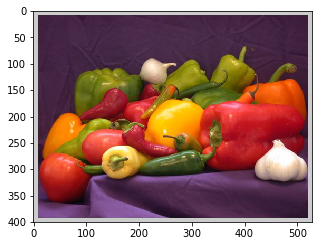

In [2]:
img_bgr = cv2.imread('vegetables.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB).astype('float32') / 255.0
plt.figure(figsize=(5,5))
plt.imshow(img)

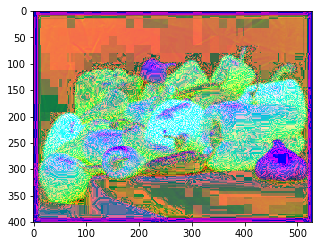

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(5,5))
plt.imshow(img_hsv)

In [4]:
img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

img_h, img_w = img_r.shape

img_h1 = img[:,:,0]
img_s = img[:,:,1]
img_v = img[:,:,2]

#X = np.vstack(( img_h1.flatten(), img_s.flatten(), img_v.flatten() )).T
X = np.vstack(( img_r.flatten(), img_g.flatten(), img_b.flatten() )).T

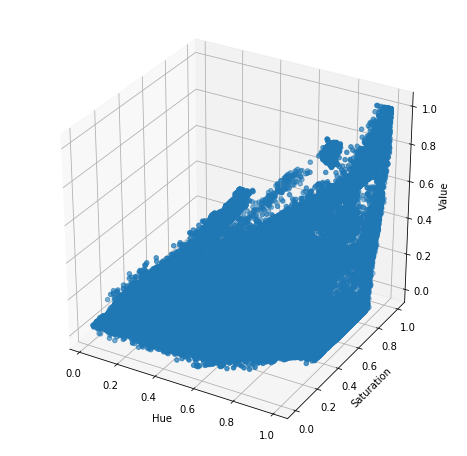

In [5]:
#import numpy as np
#import cv2
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
#ax.set_xlabel('Red')
#ax.set_ylabel('Green')
#ax.set_zlabel('Blue')
plt.show()

In [6]:
num_centers = 5

# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(X, num_centers, None, criteria, 1, flags)

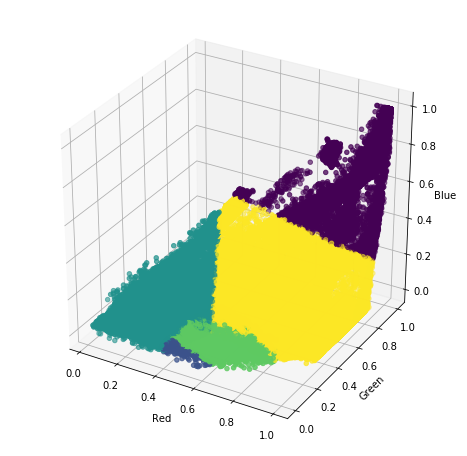

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],c=labels)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

(211600, 3)


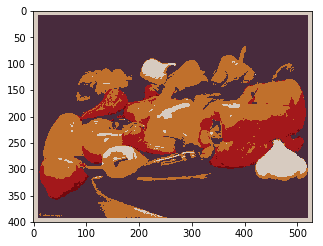

In [8]:
X_recolored = np.empty(X.shape,dtype='float32')
for i in range(0,num_centers):
    X_recolored[ np.argwhere(labels==i),: ] = centers[i, :]
print X_recolored.shape

img_recolored = np.empty( img.shape, dtype='float32' )
img_recolored[:,:,0] = X_recolored[:,0].reshape(img_h, img_w)
img_recolored[:,:,1] = X_recolored[:,1].reshape(img_h, img_w)
img_recolored[:,:,2] = X_recolored[:,2].reshape(img_h, img_w)
plt.figure(figsize=(5,5))
plt.imshow(img_recolored)
#plt.imshow(cv2.cvtColor(img_recolored, cv2.COLOR_HSV2RGB))

In [9]:
print X.shape, img_h, img_w

(211600, 3) 400 529
